In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
pd.options.display.max_rows = 1000

In [2]:
actors = pd.read_csv('/Users/jacobtryba/DSI/assignments/capstone2/data/imdb-extensive-dataset/IMDb names.csv')
movies = pd.read_csv('/Users/jacobtryba/DSI/assignments/capstone2/data/imdb-extensive-dataset/IMDb movies.csv')

In [3]:
movies_subset = ['director','imdb_title_id', 'title', 'year','duration', 'country','budget', 'usa_gross_income', 'worlwide_gross_income']

In [4]:
movies_subbed = movies[movies_subset]

In [5]:
movies_current = movies_subbed.query('year > 1986')

movies_current_usa = movies_current.query('country == "USA"')

In [6]:
movies_current_usa_nonnull_ugi = movies_current_usa[(movies_current_usa.usa_gross_income.notnull())]

In [7]:
movies_current_usa_nonnull_ugi_budget = movies_current_usa_nonnull_ugi[(movies_current_usa_nonnull_ugi.budget.notnull())]

In [8]:
final_set = movies_current_usa_nonnull_ugi_budget.sort_values('year', ascending = True)

In [9]:
final_set['budget'] = final_set['budget'].str.replace('$', '')
final_set['budget'] = final_set['budget'].str.replace('$ ', '')
final_set['budget'] = final_set['budget'].str.replace('GBP ', '')
final_set['budget'] = final_set['budget'].str.replace('AUD ', '')
final_set['budget'] = final_set['budget'].str.replace('EUR ', '')
final_set['budget'] = final_set['budget'].str.replace('ESP ', '')
final_set['usa_gross_income'] = final_set['usa_gross_income'].str.replace('$ ', '')
final_set['usa_gross_income'] = final_set['usa_gross_income'].str.replace('$', '').astype('int')
final_set['worlwide_gross_income'] = final_set['worlwide_gross_income'].str.replace('$ ', '')
final_set['worlwide_gross_income'] = final_set['worlwide_gross_income'].str.replace('$', '').astype('int')


In [10]:
final_set['international_gross_income'] = (final_set['worlwide_gross_income'] - final_set['usa_gross_income'])

In [11]:
final_set['returns'] = (final_set['worlwide_gross_income'] - final_set['budget'].astype('int'))

In [12]:
final_set['profitable'] = [1 if x > 0 else 0 for x in final_set['returns']]

In [ ]:
final_set_train = final_set.query('year < 2017')

In [ ]:
final_set_test = final_set.query('year > 2016')

In [ ]:
features = ['director', 'year', 'duration', 'budget']

In [ ]:
final_set_train = final_set_train[features]

In [14]:
final_set['director_2'] = final_set['director']

In [ ]:
final_set_train_profit = final_set_train.query('profitable == 1')
final_set_train_loss = final_set_train.query('profitable == 0')

In [ ]:
final_set_train_profit.head(3000)

In [ ]:
# scaled_data_loss = preprocessing.scale(final_set_train_loss)
scaled_data_profit = preprocessing.scale(final_set_train_profit)
# scaled_data = preprocessing.scale(final_set_train)

In [ ]:
final_set_train_profit.head(1)

In [ ]:
pca = PCA()

In [ ]:
pca.fit(scaled_data_profit)

In [ ]:
pca_data = pca.transform(scaled_data_profit)

In [ ]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)

In [ ]:
labels = ['Director', 'Year', 'Duration', 'Budget']

In [ ]:
plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Profitable')
plt.show()

In [ ]:
pca_df = pd.DataFrame(pca_data, columns = labels)

In [ ]:
plt.scatter(pca_df.Director, pca_df.Duration)
plt.title('PCA Graph Year vs Budget')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))



# plt.scatter(pca_df.Year, pca_df.Duration)
# plt.title('PCA Graph Year vs Duration')
# plt.xlabel('PC1 - {0}%'.format(per_var[0]))
# plt.ylabel('PC2 - {0}%'.format(per_var[1]))

# plt.scatter(pca_df.Year, pca_df.Budget)
# plt.title('PCA Graph Year vs Budget')
# plt.xlabel('PC1 - {0}%'.format(per_var[0]))
# plt.ylabel('PC3 - {0}%'.format(per_var[1]))

# plt.scatter(pca_df.Duration, pca_df.Budget)
# plt.title('PCA Graph Duration vs Budget')
# plt.xlabel('PC2 - {0}%'.format(per_var[0]))
# plt.ylabel('PC3 - {0}%'.format(per_var[1]))

# plt.scatter(pca_df.Duration, pca_df.Budget)
# plt.title('PCA Graph Duration vs Budget')
# plt.xlabel('PC2 - {0}%'.format(per_var[0]))
# plt.ylabel('PC3 - {0}%'.format(per_var[1]))

In [ ]:
loading_scores = pd.Series(pca.components_[0], index = )

In [ ]:
# mess with grouping by director now


In [ ]:
final_set_director = final_set.sort_values(by = 'director')

In [ ]:
final_set.nunique()

In [ ]:
final_set.count()

In [ ]:
final_set_test.nunique()

In [ ]:
final_set_test.count()

In [15]:
f = final_set.groupby('director')['title'].nunique()

In [16]:
f =f.sort_values(ascending = False)

In [17]:
f = pd.DataFrame(f).reset_index()

In [24]:
director_dict = {}
f_list = f['director'].values.copy()
f_list2 = f['title'].values.copy()
director_dict = {
    f_list[i]:f_list2[i] for i in range(len(f_list))
}

In [25]:
f_list = f['director'].values.copy()

In [26]:
f_list2 = f['title'].values.copy()

In [ ]:
for i in f_list:
    director
    director_dict[f_list] = f_list2

In [ ]:
f_list = list(f_list)
f_list2 = list(f_list2)

In [ ]:
type(f_list)

In [27]:
director_dict = {
    f_list[i]:f_list2[i] for i in range(len(f_list))
}

In [23]:
final_set['director'] = final_set['director_2']

In [29]:
final_set['director'] = final_set['director'].map(director_dict)

In [33]:
final_set['text_string'] = final_set['title'] + " " + final_set['director_2']

In [34]:
final_set.head(1)

,director,imdb_title_id,title,year,duration,country,budget,usa_gross_income,worlwide_gross_income,international_gross_income,returns,profitable,director_2,text_string
22782,20,tt0093940,September,1987,83,USA,10000000,486434,486434,0,-9513566,0,Woody Allen,September Woody Allen


In [74]:
d = final_set.groupby('director_2')['title'].nunique().copy()


In [76]:
d = pd.DataFrame(d)

In [77]:
top = d.query('title > 9')

In [78]:
top = top.sort_values(by = 'title', ascending = False)

In [81]:
top = top.copy().reset_index()

In [82]:
x = top['director_2'].values

In [83]:
y = top['title'].values

Text(0, 0.5, 'Count')

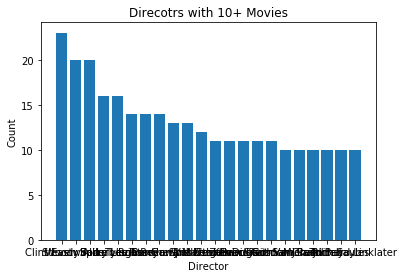

In [86]:
plt.bar(x, y)
plt.title('Direcotrs with 10+ Movies')
plt.xlabel('Director')
plt.ylabel('Count')

